{{<video https://youtu.be/playlist?list=PLQqh36zP38-yBnQwNwr2p9OAuFHfXUfVo&si=-dcYsV4g_u4qARlG>}}

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 타이타닉

### A. 영화 

![](https://i.namu.wiki/i/NvEDz4YsYDjJ9jYS4K7qv8Eo5rkAEvX5MbZ72SrvdseDvrKwpYS0SN9CvH4DfEQR9SMLXtSZBo3-LXCgFnUFwSt2GIbhp1RiwdpxuOjrIVIXNpK9e6L3kgNdXmlHWXnQmIjXvJv38DlOaPiSu5wDDg.webp)

ref: <https://namu.wiki/w/타이타닉(영화)>

### B. 데이터 

`-` 데이터 불러오기 

In [5]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


`# 예제1` -- 단순계산 

`(1)` 전체 탑승객은 몇명인가? 

In [6]:
len(df)

891

`(2)` 전체 탐승객중 몇명이 생존하였는가? 

In [7]:
sum(list(df.Survived))

342

In [8]:
sum(df.Survived)

342

`(3)` 생존률을 구하라. 

In [10]:
df.Survived.mean()

np.float64(0.3838383838383838)

`(4)` 탑승객중 남자는 몇명, 여자는 몇명인가? 

In [11]:
list(df.Sex).count("male"), list(df.Sex).count("female")

(577, 314)

`(5)` 남자와 여자의 비율은? 

In [12]:
list(df.Sex).count("male")/len(df), list(df.Sex).count("female")/len(df)

(0.6475869809203143, 0.35241301907968575)

`(6)` 탑승객이 탑승한 항구는 몇 종류인가? 종류별로 몇명의 승객이 탑승했는가? 

In [13]:
set(df.Embarked)

{'C', 'Q', 'S', nan}

In [14]:
list(df.Embarked).count("C"), list(df.Embarked).count("Q"), list(df.Embarked).count("S")

(168, 77, 644)

In [15]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

`#`

`# 예제2` -- 그룹별 생존률 

`(1)` 남녀의 생존률을 각각 구하고 비교하라. 

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


(풀이1)

In [17]:
sex = list(df.Sex)
surv = np.array(list(df.Survived))

In [18]:
surv[[l == "male" for l in sex]].mean()

np.float64(0.18890814558058924)

In [19]:
surv[[l == "female" for l in sex]].mean()

np.float64(0.7420382165605095)

(풀이2)

In [20]:
df.Survived[df.Sex == "male"].mean()

np.float64(0.18890814558058924)

In [21]:
df.Survived[df.Sex == "female"].mean()

np.float64(0.7420382165605095)

`(2)` 항구별 생존률을 각각 구하고 비교하라. 

In [22]:
df.Survived[df.Embarked == "C"].mean()

np.float64(0.5535714285714286)

In [23]:
df.Survived[df.Embarked == "Q"].mean()

np.float64(0.38961038961038963)

In [24]:
df.Survived[df.Embarked == "S"].mean()
#df[df.Embarked == "S"].Survived.mean()

np.float64(0.33695652173913043)

`(3)` 항구별 Fare를 각각 구하고 비교하라. 

In [25]:
df.Fare[df.Embarked == "C"].mean()

np.float64(59.95414404761905)

In [26]:
df.Fare[df.Embarked == "Q"].mean()

np.float64(13.276029870129872)

In [27]:
df.Fare[df.Embarked == "S"].mean()

np.float64(27.079811801242233)

`#`

`# 예제3` -- 시각화 

`(1)` Age에 대한 히스토그램을 그려라. 

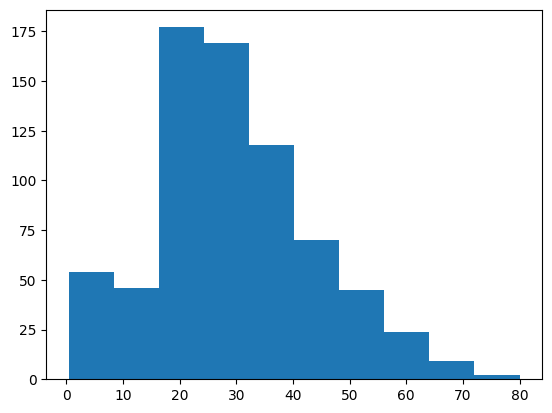

In [28]:
plt.hist(df.Age);

`(2)` 성별로 Age에 대한 히스토그램을 그려라. 

(array([23., 11., 41., 47., 44., 35., 24., 19.,  9.,  8.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <BarContainer object of 10 artists>)

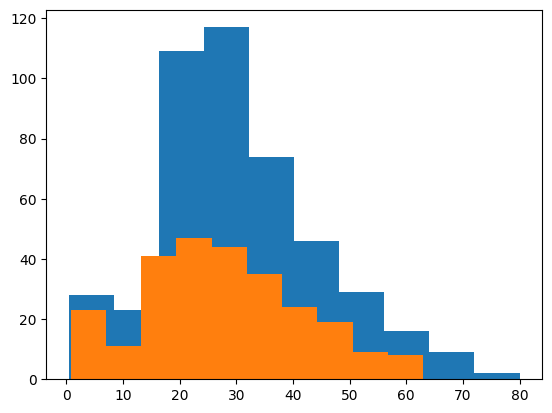

In [29]:
plt.hist(df[df.Sex == "male"].Age)
plt.hist(df[df.Sex == "female"].Age)

`(3)` 항구별/성별로 Age에 대한 히스토그램을 그려라. 

(array([ 6.,  1., 13., 11.,  6.,  4.,  7.,  4.,  6.,  3.]),
 array([ 0.75 ,  6.675, 12.6  , 18.525, 24.45 , 30.375, 36.3  , 42.225,
        48.15 , 54.075, 60.   ]),
 <BarContainer object of 10 artists>)

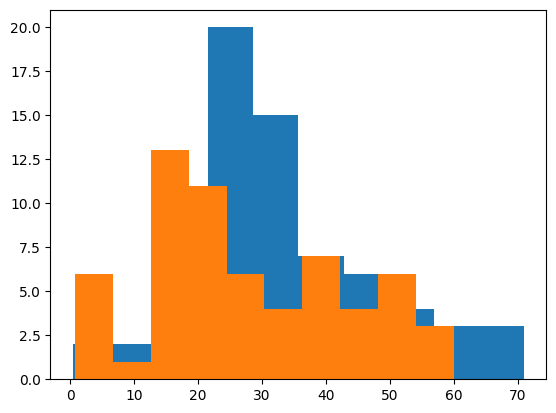

In [30]:
plt.hist(df[(df.Sex == "male") & (df.Embarked == "C")].Age)
plt.hist(df[(df.Sex == "female") & (df.Embarked == "C")].Age)

(array([18.,  8., 23., 35., 35., 27., 16., 14.,  5.,  5.]),
 array([ 1. ,  7.2, 13.4, 19.6, 25.8, 32. , 38.2, 44.4, 50.6, 56.8, 63. ]),
 <BarContainer object of 10 artists>)

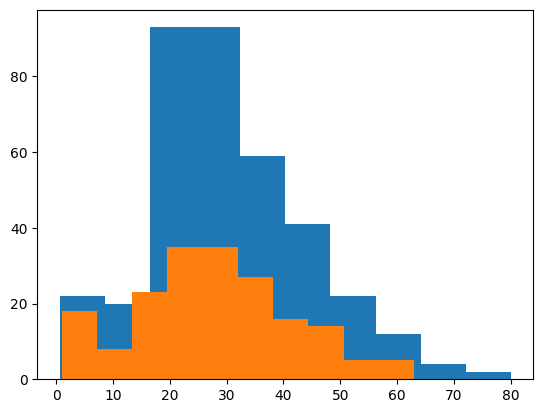

In [31]:
plt.hist(df[(df.Sex == "male") & (df.Embarked == "S")].Age)
plt.hist(df[(df.Sex == "female") & (df.Embarked == "S")].Age)

(array([3., 2., 2., 0., 0., 0., 2., 2., 0., 1.]),
 array([15. , 17.4, 19.8, 22.2, 24.6, 27. , 29.4, 31.8, 34.2, 36.6, 39. ]),
 <BarContainer object of 10 artists>)

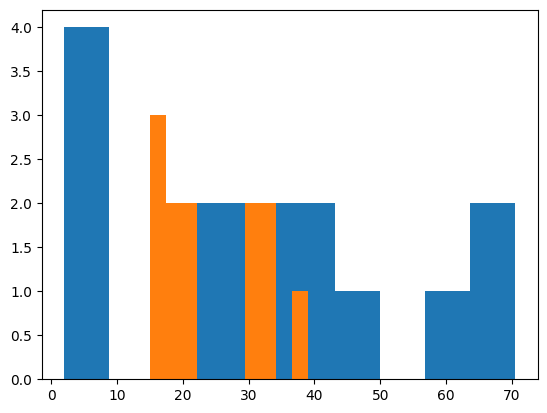

In [32]:
plt.hist(df[(df.Sex == "male") & (df.Embarked == "Q")].Age)
plt.hist(df[(df.Sex == "female") & (df.Embarked == "Q")].Age)

`#`

`# 예제4` -- 그룹별 생존률 

`(1)` 10세 미만 승객의 생존률을 구하라. 

In [33]:
df[df.Age < 10].Survived.mean()

np.float64(0.6129032258064516)

`(2)` 20대 남자의 생존률을 구하라. 

In [34]:
df[(df.Age > 20) & (df.Age < 30) & (df.Sex == "male")].Survived.mean()

np.float64(0.16296296296296298)

## 2. Pandas 행과 열의 선택

### A. df 만들기  

In [35]:
dct = {'date': ['12/30','12/31','01/01','01/02','01/03'], 'X1': [65,95,65,55,80], 'X2': [55,100,90,80,30], 'X3': [50,50,60,75,30], 'X4': [40,80,30,80,100]}
df = pd.DataFrame(dct)
df 

,date,X1,X2,X3,X4
0,12/30,65,55,50,40
1,12/31,95,100,50,80
2,01/01,65,90,60,30
3,01/02,55,80,75,80
4,01/03,80,30,30,100


### B. 열의 선택 

`-` 방법1 -- `df.`

In [36]:
# df.X1 

`-` 방법2 -- `df[]`

In [37]:
# df['X1'] # str 
# df[['X1']] # [str]
# df[['X1','X3']] # [str,str]

`-` 방법3 -- `df.iloc`

In [38]:
# df.iloc[:,0] # int
# df.iloc[:,-2:] # int:int - 슬라이싱
# df.iloc[:,1::2] # int:int - 스트라이딩
# df.iloc[:,[0]] # [int]
# df.iloc[:,[0,1]] # [int,int]
# df.iloc[:,[True,True,False,False]] # bool의 list 
# df.iloc[:,range(2)] # range

`-` 방법4 -- `df.loc`

In [39]:
# df.loc[:,'X1'] # str
# df.loc[:,'X1':'X3'] # 'str':'str' -- 칼럼이름으로 슬라이싱 **
# df.loc[:,'X1'::2] # 'str':'str' -- 칼럼이름으로 스트라이딩 ** 
# df.loc[:,['X1']] # [str]
# df.loc[:,['X1','X4']] # [str,str]
# df.loc[:,[True,False,False,True,True]] # bool의 list

**수업때 헤맨 내용 재 설명** -- 다음시간에 다시 설명할게요

자료형이 `pandas.core.series.Series` 인 경우와 `pandas.core.frame.DataFrame` 인 경우는 사용가능한 메소드가 다른 경우도 있으므로 조심해야함.

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/IAB2025-Play/refs/heads/main/content/titanic.csv")[:5]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


아래의 2개는 비슷해보이지만 약간 다를수 있음 

In [41]:
df['Survived']

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [42]:
df[['Survived']]

,Survived
0,0
1,1
2,1
3,1
4,0


`# 예시1` -- 비슷하게 동작하는 경우

In [43]:
df['Survived'].mean()

np.float64(0.6)

In [44]:
df[['Survived']].mean()

Survived    0.6
dtype: float64

`#`

`# 예시2` -- 비슷하게 동작하지 않는 경우

In [45]:
df[['Survived']].to_list()

AttributeError: 'DataFrame' object has no attribute 'to_list'

In [46]:
df['Survived'].to_list()

[0, 1, 1, 1, 0]

`#`

## 3. 숙제

In [50]:
df = pd.read_csv("titanic.csv")[:5]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived, Sex, Age열을 출력하라. 

In [49]:
#출력예시

,Survived,Sex,Age
0,0,male,22.0
1,1,female,38.0
2,1,female,26.0
3,1,female,35.0
4,0,male,35.0
